In [6]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score,confusion_matrix,make_scorer,classification_report,roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
import lightgbm as lgb
import eli5
from eli5.sklearn import PermutationImportance
from sklearn import tree
import graphviz
from pdpbox import pdp, get_dataset, info_plots
import scikitplot as skplt
from scikitplot.metrics import plot_confusion_matrix,plot_precision_recall_curve


from scipy.stats import randint as sp_randint
import warnings
warnings.filterwarnings('ignore')

import os
os.chdir("C:/Users/divij/Documents")

random_state=42
np.random.seed(random_state)

In [5]:
!pip install scikit-plot

You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
train_df = pd.read_csv("train.csv")
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [9]:
#Shape of the train dataset
train_df.shape

(200000, 202)

In [10]:
#Summary of the dataset
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [11]:
#target classes count
target_class=train_df['target'].value_counts()
print('Count of target classes :\n',target_class)
#Percentage of target classes count
per_target_class=train_df['target'].value_counts()/len(train_df)*100
print('percentage of count of target classes :\n',per_target_class)

Count of target classes :
 0    179902
1     20098
Name: target, dtype: int64
percentage of count of target classes :
 0    89.951
1    10.049
Name: target, dtype: float64


Text(0,0.5,'Index')

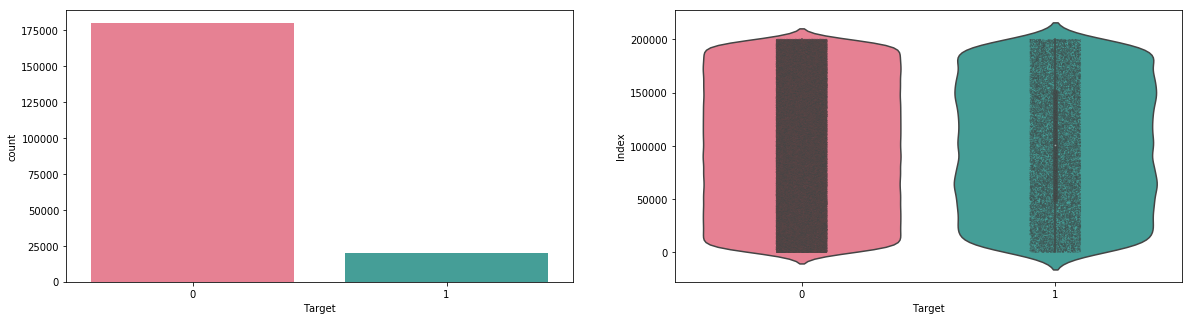

In [12]:
#Countplot and violin plot for target classes
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.countplot(train_df.target.values,ax=ax[0],palette='husl')
sns.violinplot(x=train_df.target.values,y=train_df.index.values,ax=ax[1],palette='husl')
sns.stripplot(x=train_df.target.values,y=train_df.index.values,jitter=True,color='black',linewidth=0.5,size=0.5,alpha=0.5,ax=ax[1],palette='husl')
ax[0].set_xlabel('Target')
ax[1].set_xlabel('Target')
ax[1].set_ylabel('Index')

In [13]:
%%time
#Distribution of train attributes
def plot_train_attribute_distribution(t0,t1,label1,label2,train_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in train_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(t0[attribute],hist=False,label=label1)
        sns.distplot(t1[attribute],hist=False,label=label2)
        plt.legend()
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

Wall time: 0 ns


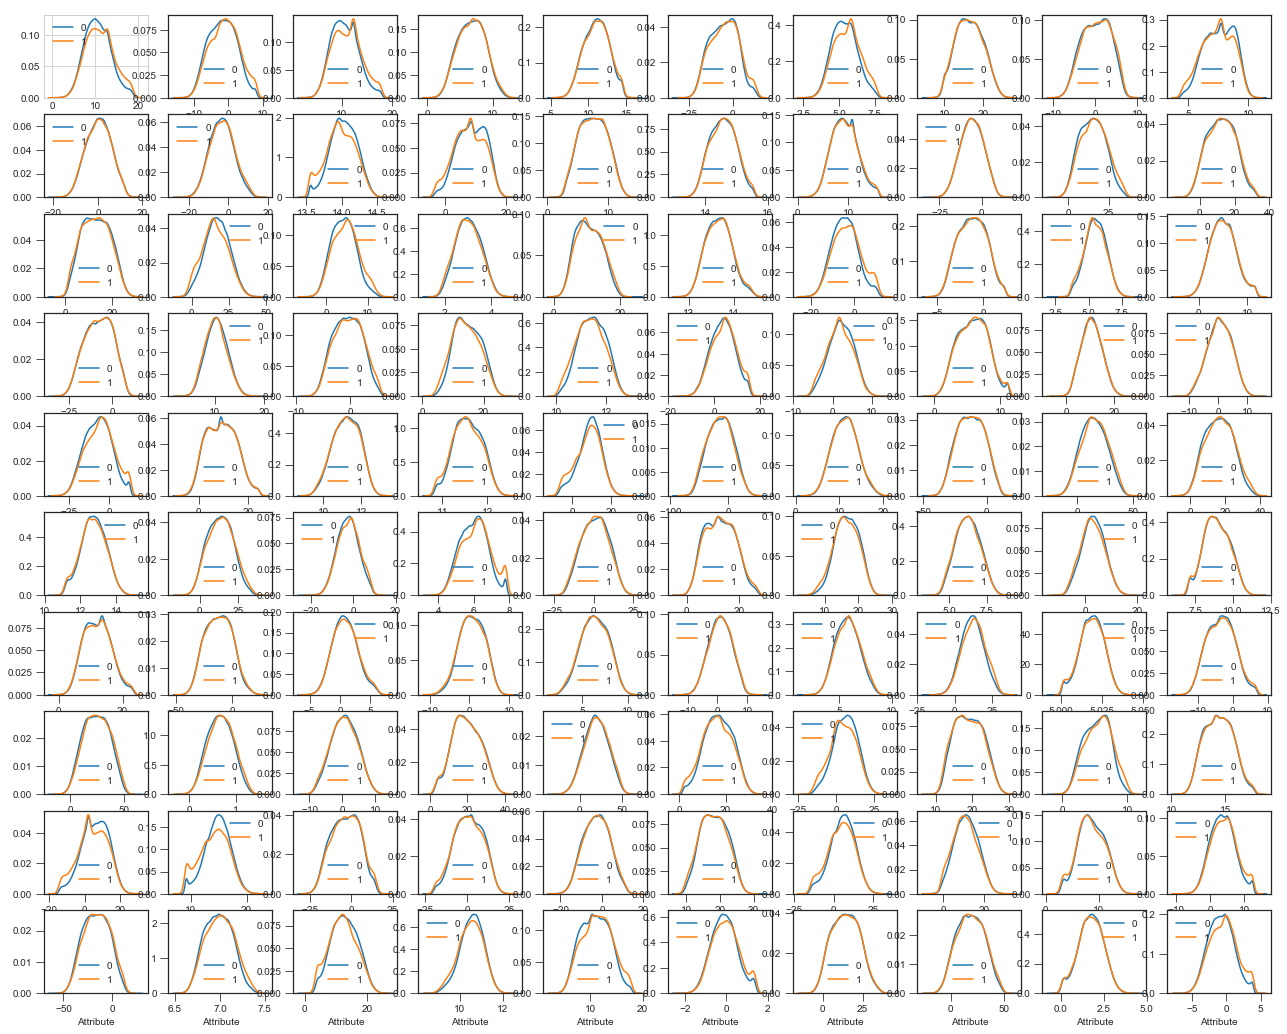

Wall time: 28.3 s


In [14]:
%%time
#corresponding to negative class
t0=train_df[train_df.target.values==0]
#corresponding to positive class
t1=train_df[train_df.target.values==1]
#train attributes from 2 to 102
train_attributes=train_df.columns.values[2:102]
#plot distribution of train attributes
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

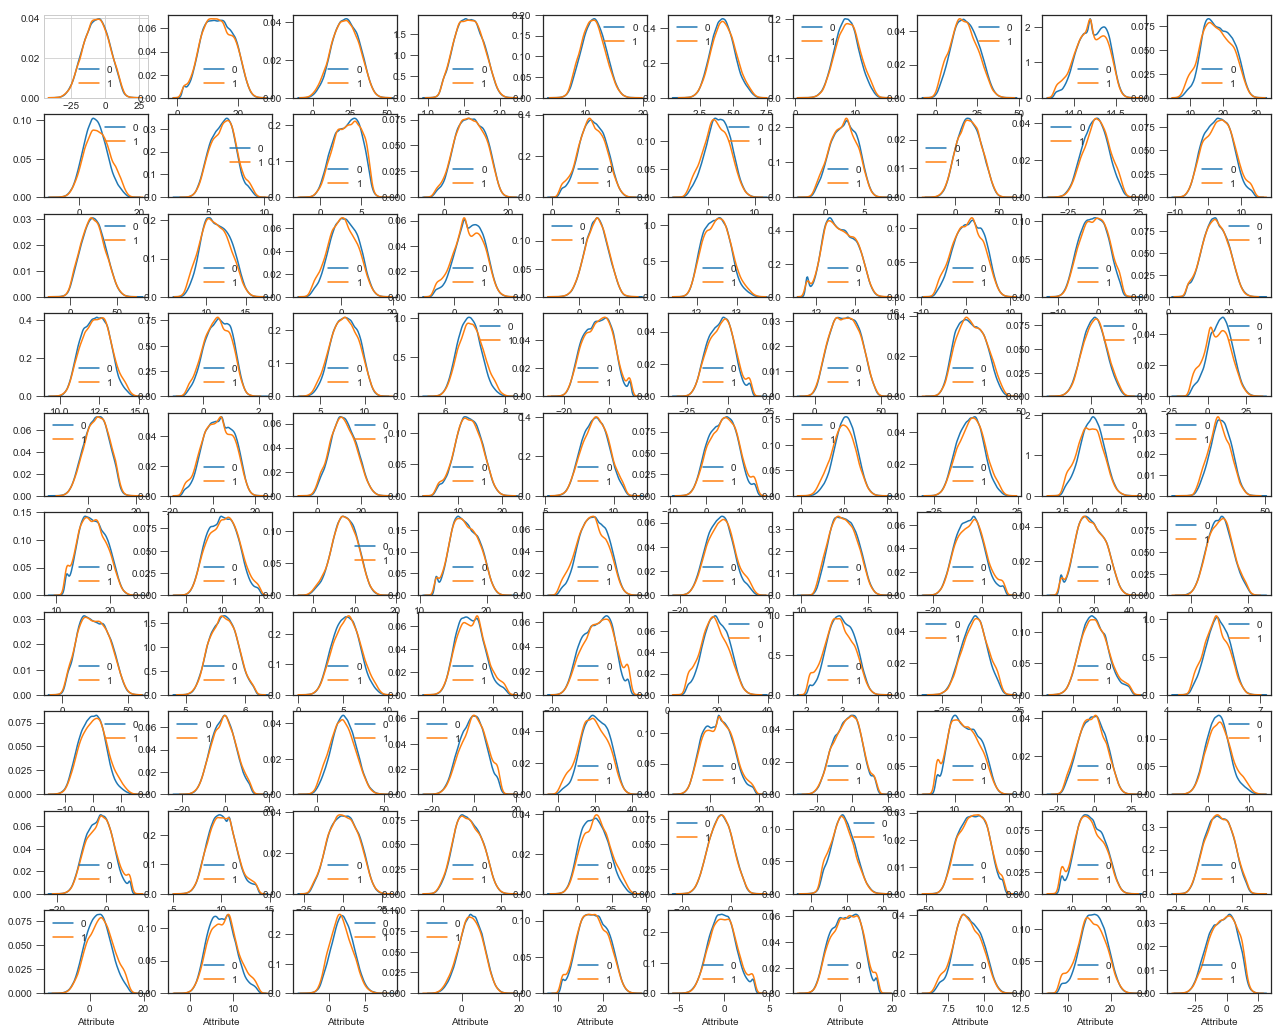

Wall time: 28.3 s


In [15]:
%%time
#train attributes from 102 to 203
train_attributes=train_df.columns.values[102:203]
#plot distribution of train attributes
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)

In [16]:
test_df = pd.read_csv("test.csv")
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [17]:
#Shape of the test dataset
test_df.shape

(200000, 201)

In [19]:
%%time
#Distribution of test attributes
def plot_test_attribute_distribution(test_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in test_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(test_df[attribute],hist=False)
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

Wall time: 0 ns


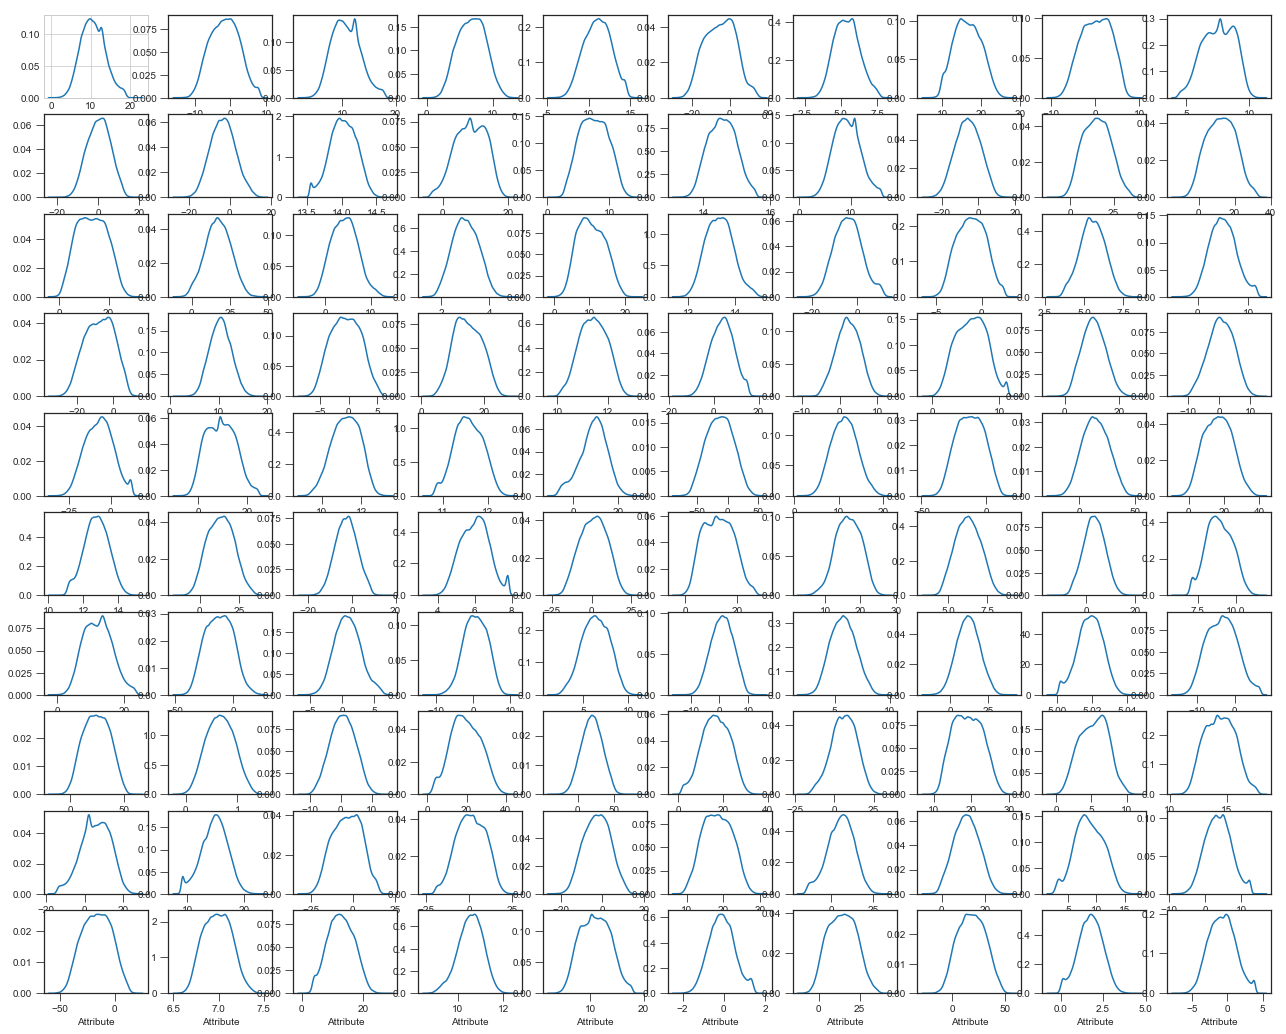

Wall time: 24.5 s


In [20]:
%%time
#test attribiutes from 1 to 101
test_attributes=test_df.columns.values[1:101]
#plot distribution of test attributes
plot_test_attribute_distribution(test_attributes)

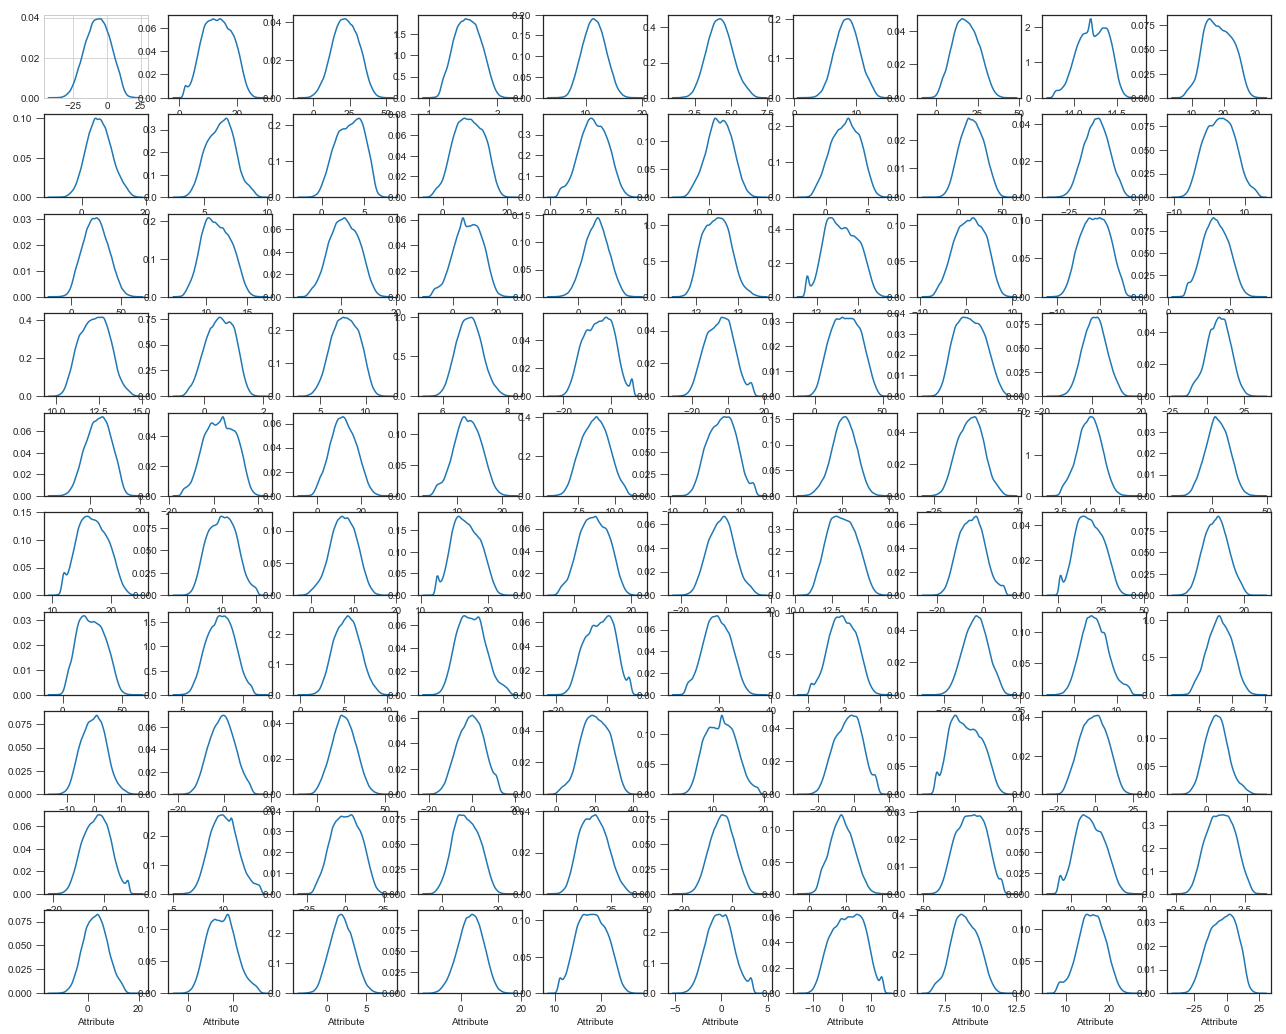

Wall time: 24.5 s


In [21]:
%%time
#test attributes from 101 to 202
test_attributes=test_df.columns.values[101:202]
#plot the distribution of test attributes
plot_test_attribute_distribution(test_attributes)

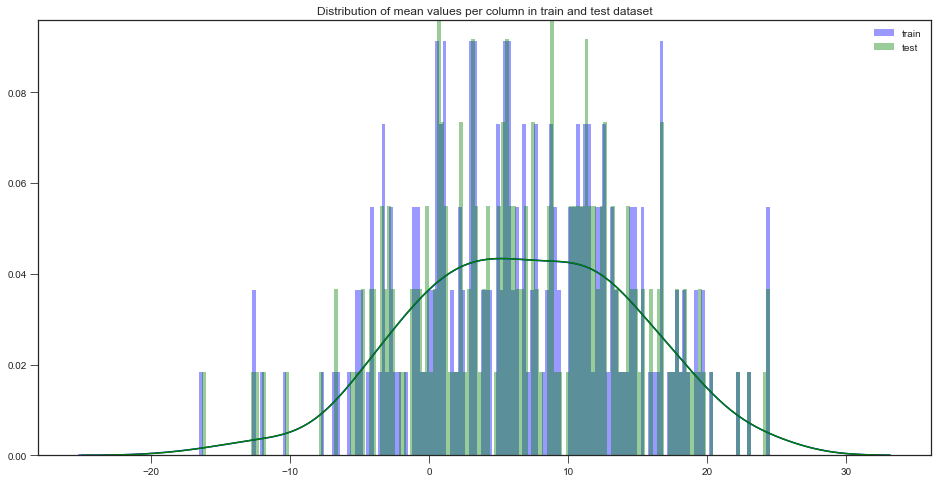

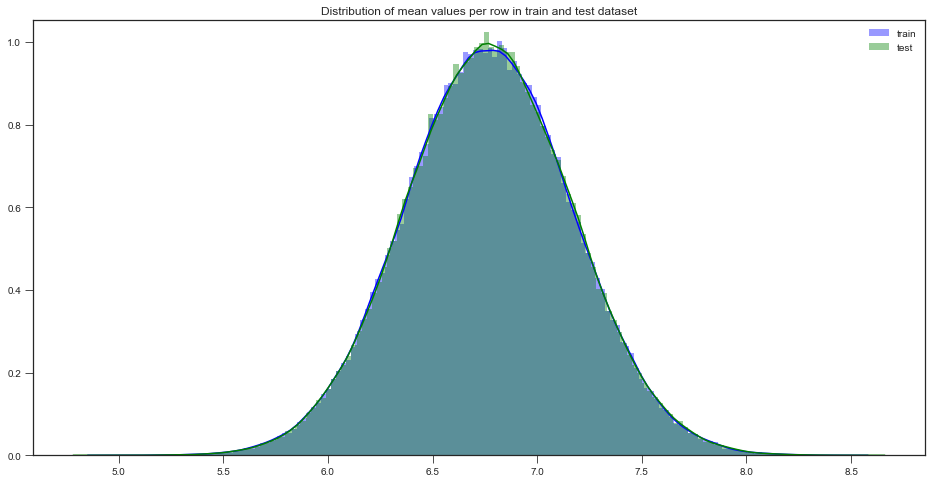

Wall time: 4.79 s


In [22]:
%%time
#Distribution of mean values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for mean values per column in train attributes
sns.distplot(train_df[train_attributes].mean(axis=0),color='blue',kde=True,bins=150,label='train')
#Distribution plot for mean values per column in test attributes
sns.distplot(test_df[test_attributes].mean(axis=0),color='green',kde=True,bins=150,label='test')
plt.title('Distribution of mean values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of mean values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for mean values per row in train attributes
sns.distplot(train_df[train_attributes].mean(axis=1),color='blue',kde=True,bins=150,label='train')
#Distribution plot for mean values per row in test attributes
sns.distplot(test_df[test_attributes].mean(axis=1),color='green',kde=True, bins=150, label='test')
plt.title('Distribution of mean values per row in train and test dataset')
plt.legend()
plt.show()


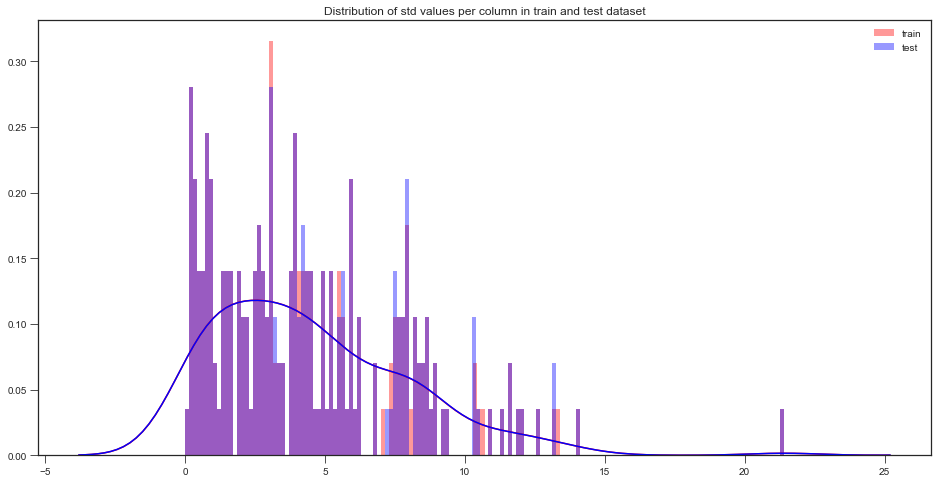

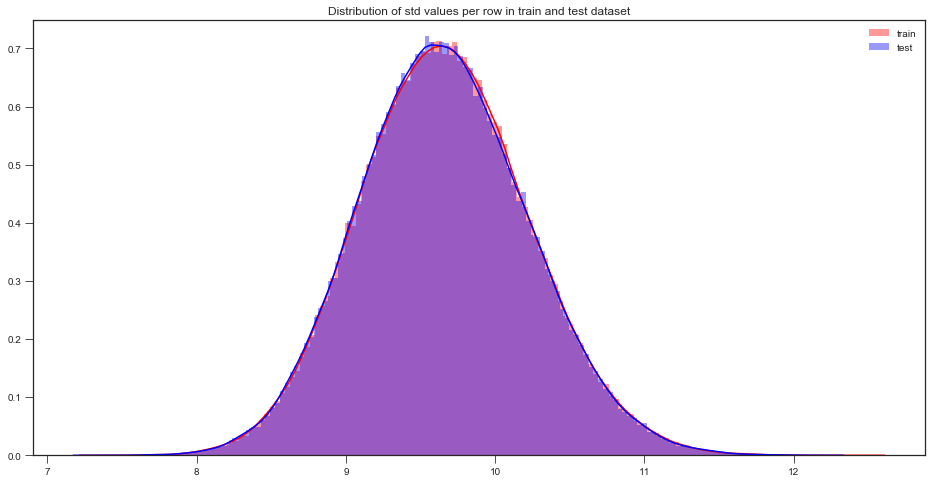

Wall time: 5.03 s


In [23]:
%%time
#Distribution of std values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for std values per column in train attributes
sns.distplot(train_df[train_attributes].std(axis=0),color='red',kde=True,bins=150,label='train')
#Distribution plot for std values per column in test attributes
sns.distplot(test_df[test_attributes].std(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of std values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of std values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for std values per row in train attributes
sns.distplot(train_df[train_attributes].std(axis=1),color='red',kde=True,bins=150,label='train')
#Distribution plot for std values per row in test attributes
sns.distplot(test_df[test_attributes].std(axis=1),color='blue',kde=True, bins=150, label='test')
plt.title('Distribution of std values per row in train and test dataset')
plt.legend()
plt.show()


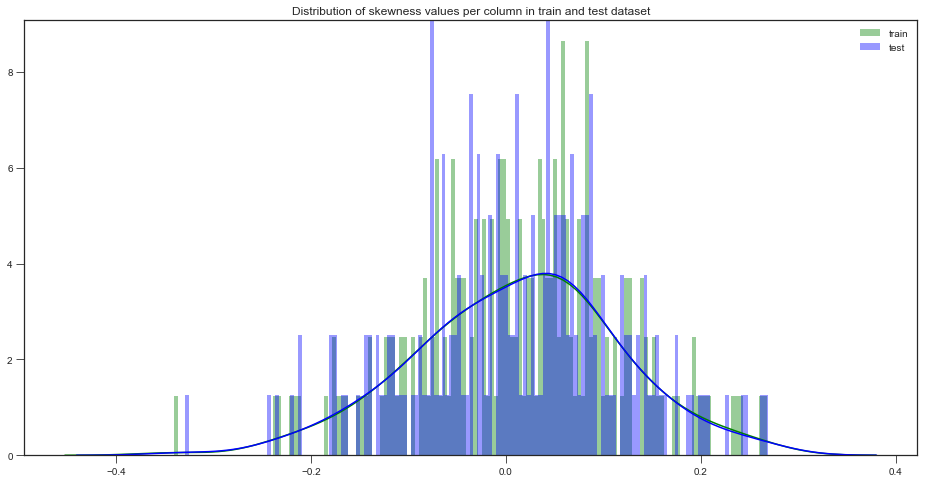

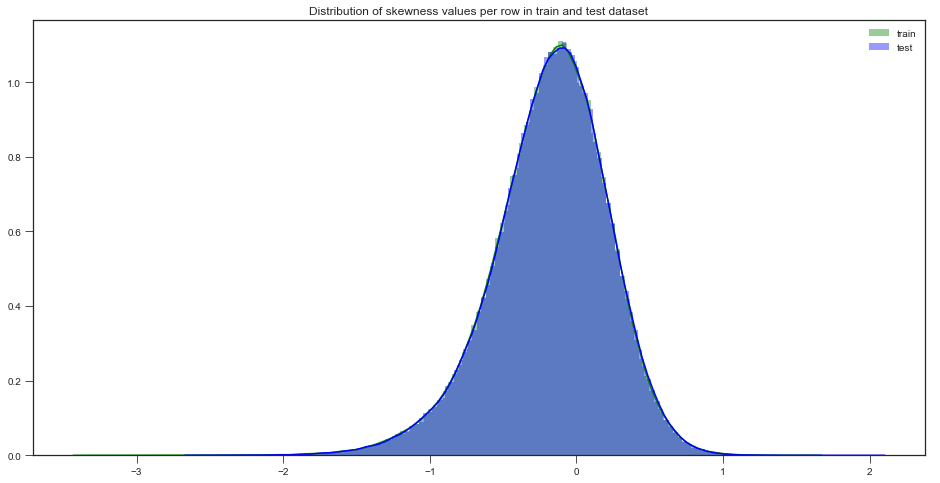

Wall time: 12.2 s


In [24]:
%%time
#Distribution of skew values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for skew values per column in train attributes
sns.distplot(train_df[train_attributes].skew(axis=0),color='green',kde=True,bins=150,label='train')
#Distribution plot for skew values per column in test attributes
sns.distplot(test_df[test_attributes].skew(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of skewness values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of skew values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for skew values per row in train attributes
sns.distplot(train_df[train_attributes].skew(axis=1),color='green',kde=True,bins=150,label='train')
#Distribution plot for skew values per row in test attributes
sns.distplot(test_df[test_attributes].skew(axis=1),color='blue',kde=True, bins=150, label='test')
plt.title('Distribution of skewness values per row in train and test dataset')
plt.legend()
plt.show()

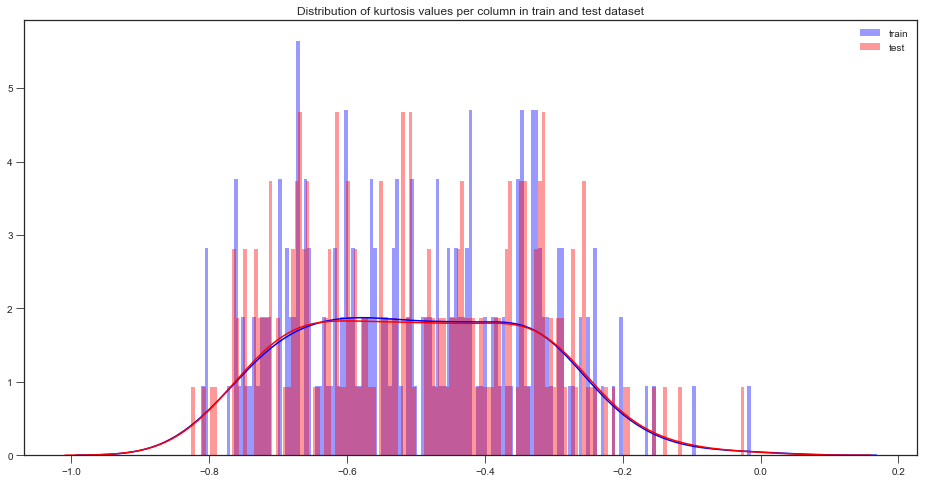

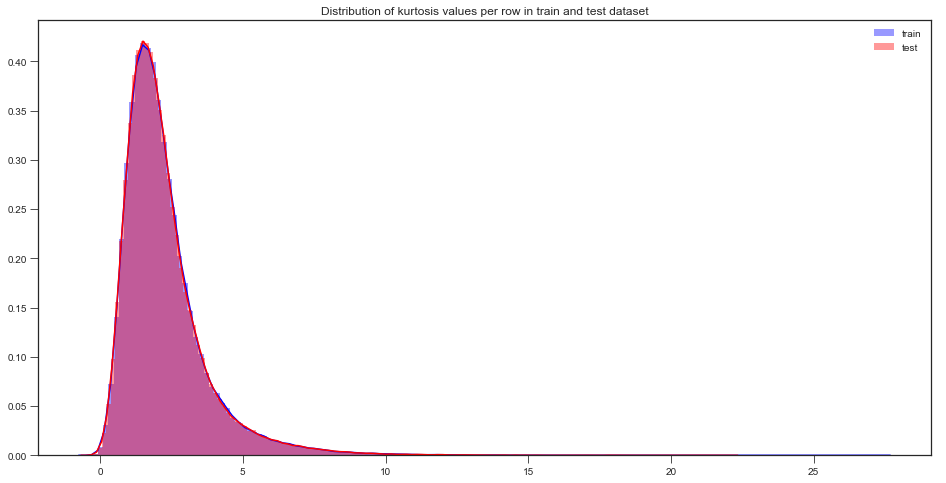

Wall time: 11.9 s


In [25]:
%%time
#Distribution of kurtosis values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for kurtosis values per column in train attributes
sns.distplot(train_df[train_attributes].kurtosis(axis=0),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per column in test attributes
sns.distplot(test_df[test_attributes].kurtosis(axis=0),color='red',kde=True,bins=150,label='test')
plt.title('Distribution of kurtosis values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of kutosis values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for kurtosis values per row in train attributes
sns.distplot(train_df[train_attributes].kurtosis(axis=1),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per row in test attributes
sns.distplot(test_df[test_attributes].kurtosis(axis=1),color='red',kde=True, bins=150, label='test')
plt.title('Distribution of kurtosis values per row in train and test dataset')
plt.legend()
plt.show()


In [26]:
%%time
#Finding the missing values in train and test data
train_missing=train_df.isnull().sum().sum()
test_missing=test_df.isnull().sum().sum()
print('Missing values in train data :',train_missing)
print('Missing values in test data :',test_missing)

Missing values in train data : 0
Missing values in test data : 0
Wall time: 2.17 s


In [27]:
%%time
#Correlations in train attributes
train_attributes=train_df.columns.values[2:202]
train_correlations=train_df[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
train_correlations=train_correlations[train_correlations['level_0']!=train_correlations['level_1']]
print(train_correlations.head(10))
print(train_correlations.tail(10))

   level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07
       level_0  level_1         0
39790  var_183  var_189  0.009359
39791  var_189  var_183  0.009359
39792  var_174   var_81  0.009490
39793   var_81  var_174  0.009490
39794   var_81  var_165  0.009714
39795  var_165   var_81  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798   var_26  var_139  0.009844
39799  var_139   var_26  0.009844
Wall time: 38.8 s


In [28]:
%%time
#Correlations in test attributes
test_attributes=test_df.columns.values[1:201]
test_correlations=test_df[test_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
test_correlations=test_correlations[test_correlations['level_0']!=test_correlations['level_1']]
print(test_correlations.head(10))
print(test_correlations.tail(10))


   level_0  level_1             0
0  var_154  var_175  1.477268e-07
1  var_175  var_154  1.477268e-07
2  var_188  var_113  1.639749e-07
3  var_113  var_188  1.639749e-07
4  var_131    var_8  4.695407e-07
5    var_8  var_131  4.695407e-07
6   var_60  var_189  9.523709e-07
7  var_189   var_60  9.523709e-07
8  var_159   var_96  1.147835e-06
9   var_96  var_159  1.147835e-06
       level_0  level_1         0
39790  var_122  var_164  0.008513
39791  var_164  var_122  0.008513
39792  var_164    var_2  0.008614
39793    var_2  var_164  0.008614
39794   var_31  var_132  0.008714
39795  var_132   var_31  0.008714
39796   var_96  var_143  0.008829
39797  var_143   var_96  0.008829
39798  var_139   var_75  0.009868
39799   var_75  var_139  0.009868
Wall time: 38.3 s


Wall time: 1min 18s


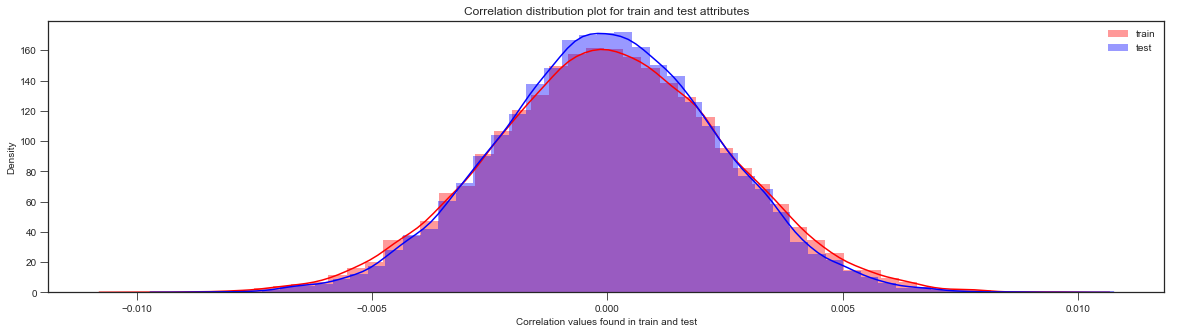

In [29]:
%%time
#Correlations in train data
train_correlations=train_df[train_attributes].corr()
train_correlations=train_correlations.values.flatten()
train_correlations=train_correlations[train_correlations!=1]
#Correlations in test data
test_correlations=test_df[test_attributes].corr()
test_correlations=test_correlations.values.flatten()
test_correlations=test_correlations[test_correlations!=1]

plt.figure(figsize=(20,5))
#Distribution plot for correlations in train data
sns.distplot(train_correlations, color="Red", label="train")
#Distribution plot for correlations in test data
sns.distplot(test_correlations, color="Blue", label="test")
plt.xlabel("Correlation values found in train and test")
plt.ylabel("Density")
plt.title("Correlation distribution plot for train and test attributes")
plt.legend()

In [30]:
#training and testing data
X=train_df.drop(columns=['ID_code','target'],axis=1)
test=test_df.drop(columns=['ID_code'],axis=1)
y=train_df['target']

In [31]:
#Split the training data
X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=42)

print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (150000, 200)
Shape of X_valid : (50000, 200)
Shape of y_train : (150000,)
Shape of y_valid : (50000,)


In [32]:
%%time
#Random forest classifier
rf_model=RandomForestClassifier(n_estimators=10,random_state=42)
#fitting the model
rf_model.fit(X_train,y_train)

Wall time: 2min 26s


In [33]:
%%time
#Permutation importance
from eli5.sklearn import PermutationImportance
perm_imp=PermutationImportance(rf_model,random_state=42)
#fitting the model
perm_imp.fit(X_valid,y_valid)

Wall time: 4min 28s


In [34]:
%%time
#Important features
eli5.show_weights(perm_imp,feature_names=X_valid.columns.tolist(),top=200)

Wall time: 594 ms


Weight,Feature
0.0004 ± 0.0002,var_81
0.0003 ± 0.0002,var_146
0.0003 ± 0.0002,var_109
0.0003 ± 0.0002,var_12
0.0002 ± 0.0001,var_110
0.0002 ± 0.0000,var_173
0.0002 ± 0.0001,var_174
0.0002 ± 0.0002,var_0
0.0002 ± 0.0002,var_26
0.0001 ± 0.0001,var_166


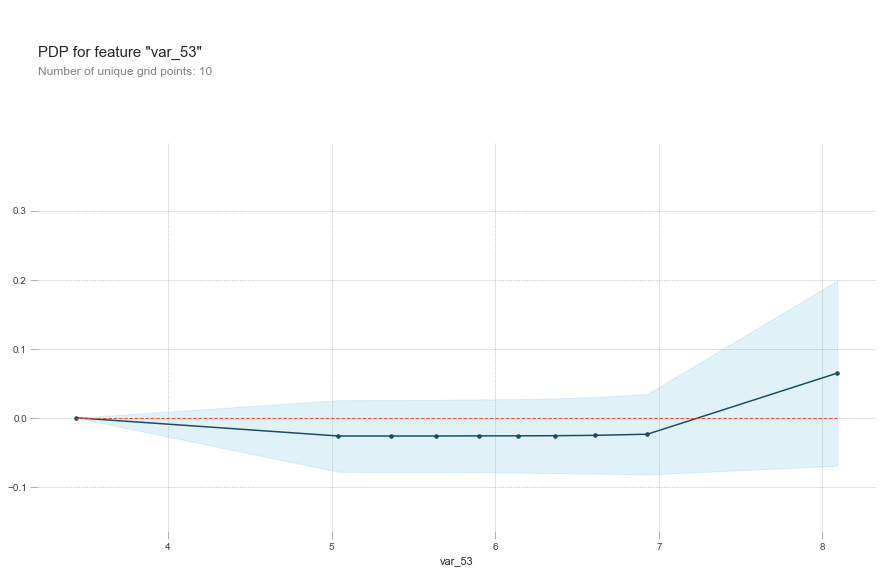

Wall time: 6.12 s


In [35]:
%%time
#Create the data we will plot 'var_53'
features=[v for v in X_valid.columns if v not in ['ID_code','target']]
pdp_data=pdp.pdp_isolate(rf_model,dataset=X_valid,model_features=features,feature='var_53')
#plot feature "var_53"
pdp.pdp_plot(pdp_data,'var_53')
plt.show()

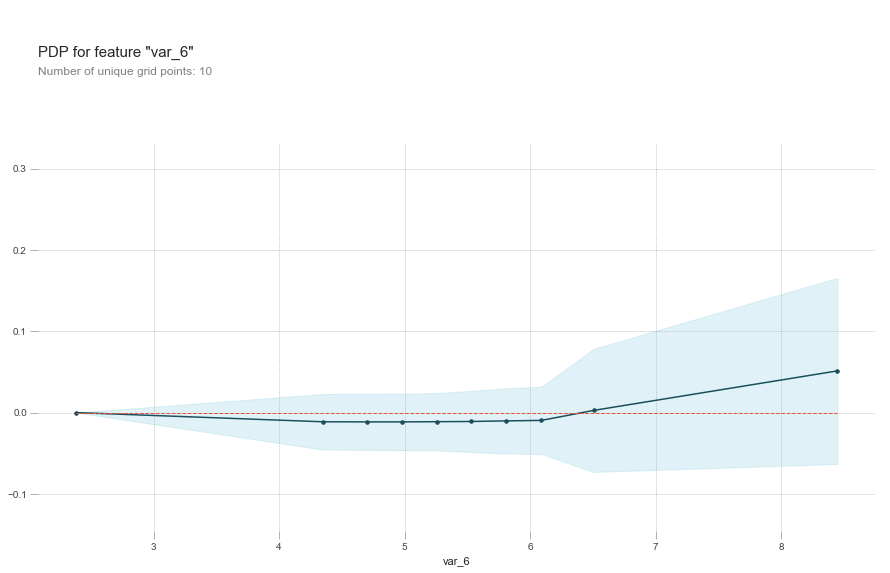

Wall time: 4.84 s


In [36]:
%%time
#Create the data we will plot 
pdp_data=pdp.pdp_isolate(rf_model,dataset=X_valid,model_features=features,feature='var_6')
#plot feature "var_6"
pdp.pdp_plot(pdp_data,'var_6')
plt.show()

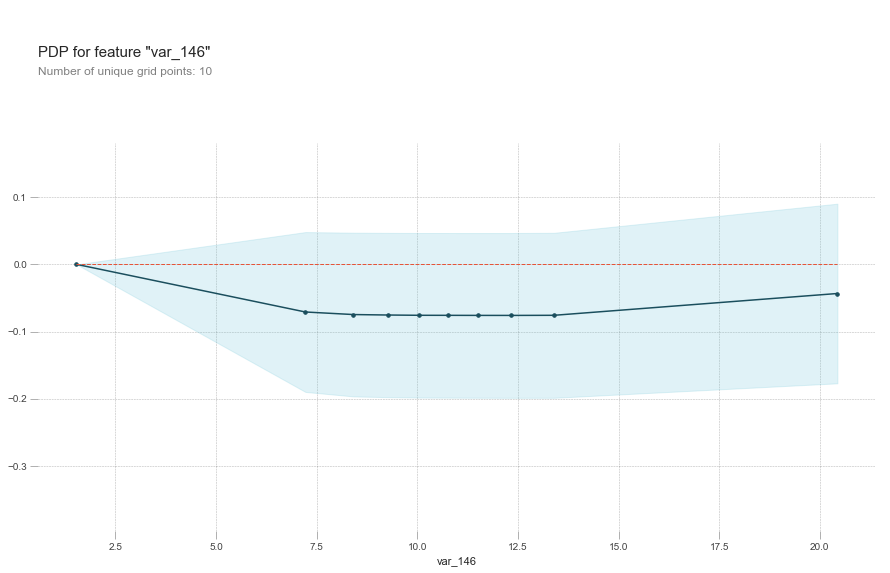

Wall time: 5.16 s


In [37]:
%%time
#Create the data we will plot 
pdp_data=pdp.pdp_isolate(rf_model,dataset=X_valid,model_features=features,feature='var_146')
#plot feature "var_146"
pdp.pdp_plot(pdp_data,'var_146')
plt.show()

In [38]:
#Training data
X=train_df.drop(['ID_code','target'],axis=1)
Y=train_df['target']
#StratifiedKFold cross validator
cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
for train_index,valid_index in cv.split(X,Y):
    X_train, X_valid=X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid=Y.iloc[train_index], Y.iloc[valid_index]

print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (160001, 200)
Shape of X_valid : (39999, 200)
Shape of y_train : (160001,)
Shape of y_valid : (39999,)


In [39]:
%%time
#Logistic regression model
lr_model=LogisticRegression(random_state=42)
#fitting the lr model
lr_model.fit(X_train,y_train)

Wall time: 3min 33s


In [40]:
#Accuracy of the model
lr_score=lr_model.score(X_train,y_train)
print('Accuracy of the lr_model :',lr_score)

Accuracy of the lr_model : 0.9145255342154112


In [41]:
%%time
#Cross validation prediction
cv_predict=cross_val_predict(lr_model,X_valid,y_valid,cv=5)
#Cross validation score
cv_score=cross_val_score(lr_model,X_valid,y_valid,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.9132728184773097
Wall time: 6min 1s


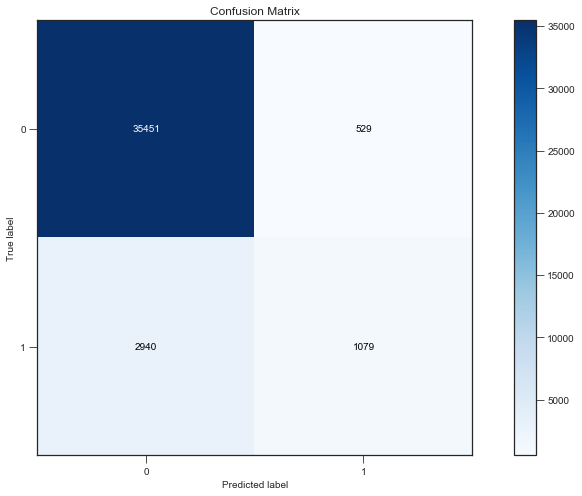

In [42]:
#Confusion matrix
cm=confusion_matrix(y_valid,cv_predict)
#Plot the confusion matrix
plot_confusion_matrix(y_valid,cv_predict,normalize=False,figsize=(15,8))


ROC score : 0.6268860661994493


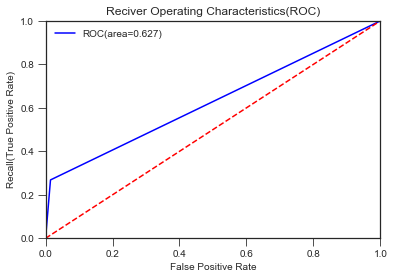

AUC: 0.6268860661994493


In [43]:
#ROC_AUC score
roc_score=roc_auc_score(y_valid,cv_predict)
print('ROC score :',roc_score)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_valid,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [44]:
#Classification report
scores=classification_report(y_valid,cv_predict)
print(scores)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.67      0.27      0.38      4019

   micro avg       0.91      0.91      0.91     39999
   macro avg       0.80      0.63      0.67     39999
weighted avg       0.90      0.91      0.90     39999



In [45]:
%%time
#Predicting the model
X_test=test_df.drop(['ID_code'],axis=1)
lr_pred=lr_model.predict(X_test)
print(lr_pred)

[0 0 0 ... 0 0 0]
Wall time: 332 ms


In [46]:
%%time
from imblearn.over_sampling import SMOTE
#Synthetic Minority Oversampling Technique
sm = SMOTE(random_state=42, ratio=1.0)
#Generating synthetic data points
X_smote,y_smote=sm.fit_sample(X_train,y_train)
X_smote_v,y_smote_v=sm.fit_sample(X_valid,y_valid)

Wall time: 2min 53s


In [47]:
%%time
#Logistic regression model for SMOTE
smote=LogisticRegression(random_state=42)
#fitting the smote model
smote.fit(X_smote,y_smote)

Wall time: 9min 41s


In [48]:
#Accuracy of the model
smote_score=smote.score(X_smote,y_smote)
print('Accuracy of the smote_model :',smote_score)

Accuracy of the smote_model : 0.7984498547824516


In [49]:
%%time
#Cross validation prediction
cv_pred=cross_val_predict(smote,X_smote_v,y_smote_v,cv=5)
#Cross validation score
cv_score=cross_val_score(smote,X_smote_v,y_smote_v,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.8043079488604781
Wall time: 14min 49s


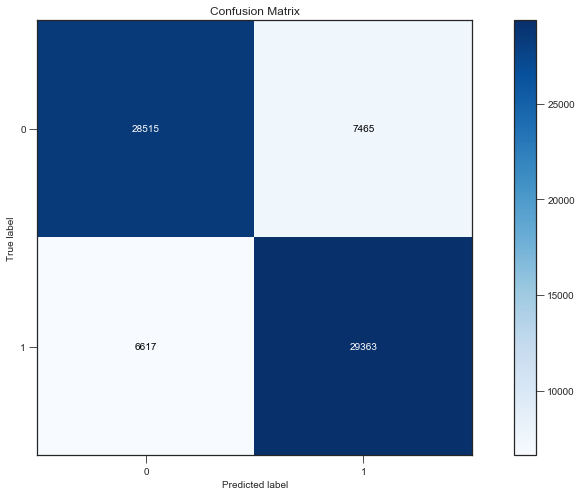

In [50]:
#Confusion matrix
cm=confusion_matrix(y_smote_v,cv_pred)
#Plot the confusion matrix
plot_confusion_matrix(y_smote_v,cv_pred,normalize=False,figsize=(15,8))

ROC score : 0.804307948860478


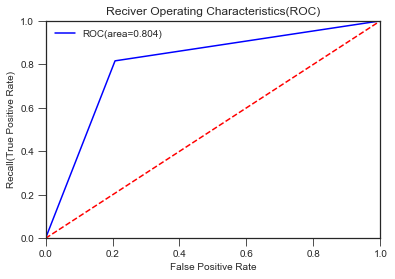

AUC: 0.804307948860478


In [51]:
#ROC_AUC score
roc_score=roc_auc_score(y_smote_v,cv_pred)
print('ROC score :',roc_score)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_smote_v,cv_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [52]:
#Classification report
scores=classification_report(y_smote_v,cv_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     35980
           1       0.80      0.82      0.81     35980

   micro avg       0.80      0.80      0.80     71960
   macro avg       0.80      0.80      0.80     71960
weighted avg       0.80      0.80      0.80     71960



In [53]:
%%time
#Predicting the model
X_test=test_df.drop(['ID_code'],axis=1)
smote_pred=smote.predict(X_test)
print(smote_pred)

[1 1 0 ... 0 0 1]
Wall time: 6min 10s


In [54]:
#Training the model
#training data
lgb_train=lgb.Dataset(X_train,label=y_train)
#validation data
lgb_valid=lgb.Dataset(X_valid,label=y_valid)

In [55]:
#Selecting best hyperparameters by tuning of different parameters
params={'boosting_type': 'gbdt', 
          'max_depth' : -1, #no limit for max_depth if <0
          'objective': 'binary',
          'boost_from_average':False, 
          'nthread': 20,
          'metric':'auc',
          'num_leaves': 50,
          'learning_rate': 0.01,
          'max_bin': 100,      #default 255
          'subsample_for_bin': 100,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'bagging_fraction':0.5,
          'bagging_freq':5,
          'feature_fraction':0.08,
          'min_split_gain': 0.45, #>0
          'min_child_weight': 1,
          'min_child_samples': 5,
          'is_unbalance':True,
          }

In [56]:
num_rounds=10000
lgbm= lgb.train(params,lgb_train,num_rounds,valid_sets=[lgb_train,lgb_valid],verbose_eval=1000,early_stopping_rounds = 5000)
lgbm

Training until validation scores don't improve for 5000 rounds
[1000]	training's auc: 0.939079	valid_1's auc: 0.882655
[2000]	training's auc: 0.958502	valid_1's auc: 0.887842
[3000]	training's auc: 0.971937	valid_1's auc: 0.889724
[4000]	training's auc: 0.981492	valid_1's auc: 0.890474
[5000]	training's auc: 0.988242	valid_1's auc: 0.890772
[6000]	training's auc: 0.992813	valid_1's auc: 0.890549
[7000]	training's auc: 0.995775	valid_1's auc: 0.890488
[8000]	training's auc: 0.997627	valid_1's auc: 0.890549
[9000]	training's auc: 0.998739	valid_1's auc: 0.890309
[10000]	training's auc: 0.999359	valid_1's auc: 0.889882
Did not meet early stopping. Best iteration is:
[10000]	training's auc: 0.999359	valid_1's auc: 0.889882


In [57]:
X_test=test_df.drop(['ID_code'],axis=1)
#predict the model
#probability predictions
lgbm_predict_prob=lgbm.predict(X_test,random_state=42,num_iteration=lgbm.best_iteration)
#Convert to binary output 1 or 0
lgbm_predict=np.where(lgbm_predict_prob>=0.5,1,0)
print(lgbm_predict_prob)
print(lgbm_predict)

[0.38391682 0.41261082 0.33964579 ... 0.0058249  0.13459858 0.26750038]
[0 0 0 ... 0 0 0]


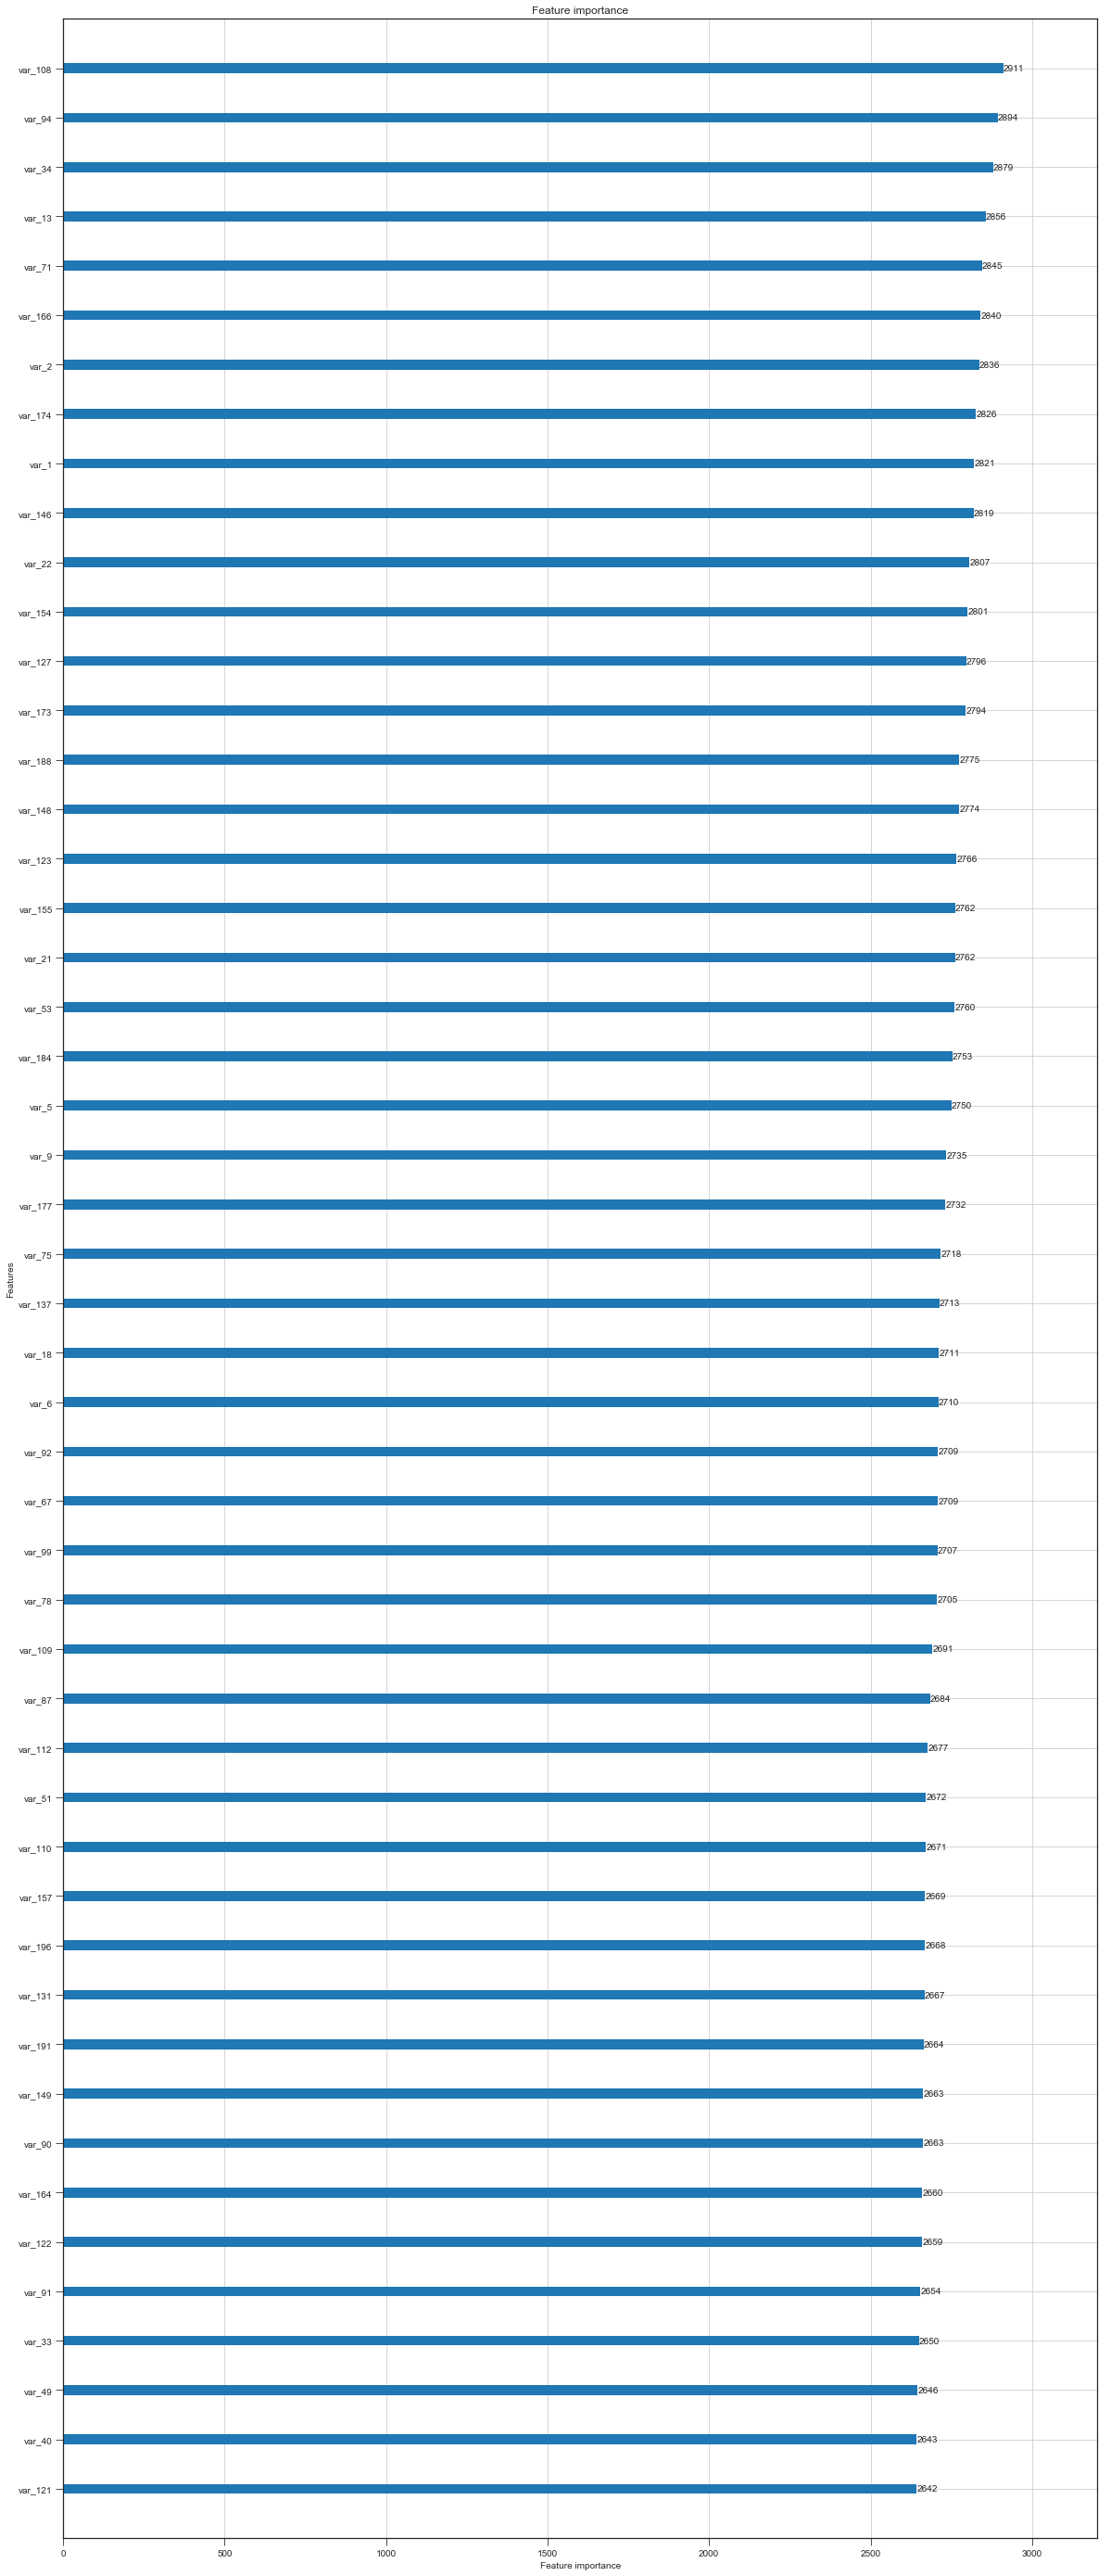

In [58]:
#plot the important features
lgb.plot_importance(lgbm,max_num_features=50,importance_type="split",figsize=(20,50))

In [59]:
#final submission
sub_df=pd.DataFrame({'ID_code':test_df['ID_code'].values})
sub_df['lgbm_predict_prob']=lgbm_predict_prob
sub_df['lgbm_predict']=lgbm_predict
sub_df.to_csv('submission.csv',index=False)
sub_df.head()

,ID_code,lgbm_predict_prob,lgbm_predict
0,test_0,0.383917,0
1,test_1,0.412611,0
2,test_2,0.339646,0
3,test_3,0.255199,0
4,test_4,0.150399,0
